<a href="https://colab.research.google.com/github/warut/DrivenData/blob/PracticeFluShots/Driven_Data_Practice_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q "google-generativeai>=0.8.3"

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [ ]:
!pip install shap

In [ ]:
import os
import shutil

from google.colab import files

kaggle_dir = '/root/.kaggle'
#kaggle_json_drive = '/content/drive/My Drive/kaggle/kaggle.json'
kaggle_json_colab = f'{kaggle_dir}/kaggle.json'

os.makedirs(kaggle_dir, exist_ok=True)

# Upload kaggle.json if it doesn't already exist
if not os.path.exists(kaggle_json_colab):
    uploaded = files.upload()
    shutil.move('kaggle.json', kaggle_json_colab)
    os.chmod(kaggle_json_colab, 0o600)


Saving kaggle.json to kaggle.json


In [ ]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

In [ ]:
#from kaggle_secrets import UserSecretsClient

#GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.colab import files
files.upload();

Saving test_set_features.csv to test_set_features.csv
Saving training_set_labels.csv to training_set_labels.csv
Saving training_set_features.csv to training_set_features.csv


In [ ]:
# -------------------- For Data Visualization --------------------
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import *
from catboost import datasets

In [ ]:
import numpy as np
import pandas as pd

ptrain = "/content/training_set_features.csv"
ptest = "/content/test_set_features.csv"
df_train=pd.read_csv(ptrain)
df_test=pd.read_csv(ptest)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [ ]:
df_train.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [ ]:
df_train_out = pd.read_csv("/content/training_set_labels.csv")
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [ ]:
df_train_out.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [ ]:
# Selecting numeric columns (of type 'float' or 'int') from the 'factors' DataFrame
numeric_columns = df_train.select_dtypes(include=['float', 'int']).columns

# Selecting object columns (of type 'object') from the 'factors' DataFrame
object_columns = df_train.select_dtypes(include=['object']).columns

In [ ]:
numeric_columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [ ]:
#%%timeit
#temp=df_train.copy()
subset=numeric_columns.difference(['respondent_id'])
#temp.loc[:,subset]=temp.loc[:,subset].astype(str)
temp=df_train[numeric_columns.difference(['respondent_id'])].astype('category')
pd.concat([df_train['respondent_id'],temp],axis=1)

respondent_id behavioral_antiviral_meds behavioral_avoidance  \
0                  0                       0.0                  0.0   
1                  1                       0.0                  1.0   
2                  2                       0.0                  1.0   
3                  3                       0.0                  1.0   
4                  4                       0.0                  1.0   
...              ...                       ...                  ...   
26702          26702                       0.0                  1.0   
26703          26703                       0.0                  1.0   
26704          26704                       0.0                  1.0   
26705          26705                       0.0                  0.0   
26706          26706                       0.0                  1.0   

      behavioral_face_mask behavioral_large_gatherings  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         1.0   
4                      0.0                         1.0   
...                    ...                         ...   
26702                  0.0                         0.0   
26703                  0.0                         0.0   
26704                  1.0                         1.0   
26705                  0.0                         0.0   
26706                  0.0                         0.0   

      behavioral_outside_home behavioral_touch_face behavioral_wash_hands  \
0                         1.0                   1.0                   0.0   
1                         1.0                   1.0                   1.0   
2                         0.0                   0.0                   0.0   
3                         0.0                   0.0                   1.0   
4                         0.0                   1.0                   1.0   
...                       ...                   ...                   ...   
26702                     1.0                   0.0                   0.0   
26703                     0.0                   0.0                   1.0   
26704                     0.0                   1.0                   1.0   
26705                     0.0                   NaN                   0.0   
26706                     0.0                   0.0                   0.0   

      child_under_6_months chronic_med_condition  ... health_insurance  \
0                      0.0                   0.0  ...              1.0   
1                      0.0                   0.0  ...              1.0   
2                      0.0                   1.0  ...              NaN   
3                      0.0                   1.0  ...              NaN   
4                      0.0                   0.0  ...              NaN   
...                    ...                   ...  ...              ...   
26702                  0.0                   0.0  ...              NaN   
26703                  0.0                   0.0  ...              1.0   
26704                  0.0                   0.0  ...              NaN   
26705                  0.0                   0.0  ...              0.0   
26706                  0.0                   0.0  ...              1.0   

      health_worker household_adults household_children opinion_h1n1_risk  \
0               0.0              0.0                0.0               1.0   
1               0.0              0.0                0.0               4.0   
2               0.0              2.0                0.0               1.0   
3               0.0              0.0                0.0               3.0   
4               0.0              1.0                0.0               3.0   
...             ...              ...                ...               ...   
26702           0.0              0.0                0.0               1.0   
26703           1.0        

In [ ]:
df_train[df_train['health_insurance'].isna()].index.to_list()[:5]
df_train.iloc[2]
type(temp.iloc[2]['health_insurance'])

numpy.float64

In [ ]:
type(temp.iloc[2]['health_insurance'])

numpy.float64

In [ ]:
object_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [ ]:
colH1N1=df_train.filter(like='h1n1',axis=1).columns
colH1N1

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc'],
      dtype='object')

In [ ]:
colSEA=df_train.filter(like='sea',axis=1).columns
colSEA

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')

In [ ]:
colCOM=df_train.columns.difference(colH1N1.union(colSEA)).drop('respondent_id')
colCOM

Index(['age_group', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'census_msa', 'child_under_6_months',
       'chronic_med_condition', 'education', 'employment_industry',
       'employment_occupation', 'employment_status', 'health_insurance',
       'health_worker', 'hhs_geo_region', 'household_adults',
       'household_children', 'income_poverty', 'marital_status', 'race',
       'rent_or_own', 'sex'],
      dtype='object')

In [ ]:
df_train[colCOM].head()

age_group  behavioral_antiviral_meds  behavioral_avoidance  \
0  55 - 64 Years                        0.0                   0.0   
1  35 - 44 Years                        0.0                   1.0   
2  18 - 34 Years                        0.0                   1.0   
3      65+ Years                        0.0                   1.0   
4  45 - 54 Years                        0.0                   1.0   

   behavioral_face_mask  behavioral_large_gatherings  behavioral_outside_home  \
0                   0.0                          0.0                      1.0   
1                   0.0                          0.0                      1.0   
2                   0.0                          0.0                      0.0   
3                   0.0                          1.0                      0.0   
4                   0.0                          1.0                      0.0   

   behavioral_touch_face  behavioral_wash_hands                census_msa  \
0                    1.0                    0.0                   Non-MSA   
1                    1.0                    1.0  MSA, Not Principle  City   
2                    0.0                    0.0  MSA, Not Principle  City   
3                    0.0                    1.0       MSA, Principle City   
4                    1.0                    1.0  MSA, Not Principle  City   

   child_under_6_months  ...  health_insurance health_worker hhs_geo_region  \
0                   0.0  ...               1.0           0.0       oxchjgsf   
1                   0.0  ...               1.0           0.0       bhuqouqj   
2                   0.0  ...               NaN           0.0       qufhixun   
3                   0.0  ...               NaN           0.0       lrircsnp   
4                   0.0  ...               NaN           0.0       qufhixun   

  household_adults household_children             income_poverty  \
0              0.0                0.0              Below Poverty   
1              0.0                0.0              Below Poverty   
2              2.0                0.0  <= $75,000, Above Poverty   
3              0.0                0.0              Below Poverty   
4              1.0                0.0  <= $75,000, Above Poverty   

   marital_status   race  rent_or_own     sex  
0     Not Married  White          Own  Female  
1     Not Married  White         Rent    Male  
2     Not Married  White          Own    Male  
3     Not Married  White         Rent  Female  
4         Married  White          Own  Female  

[5 rows x 25 columns]

In [ ]:
df_train['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

In [ ]:
df_train['health_insurance'].isna().sum()

12274

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


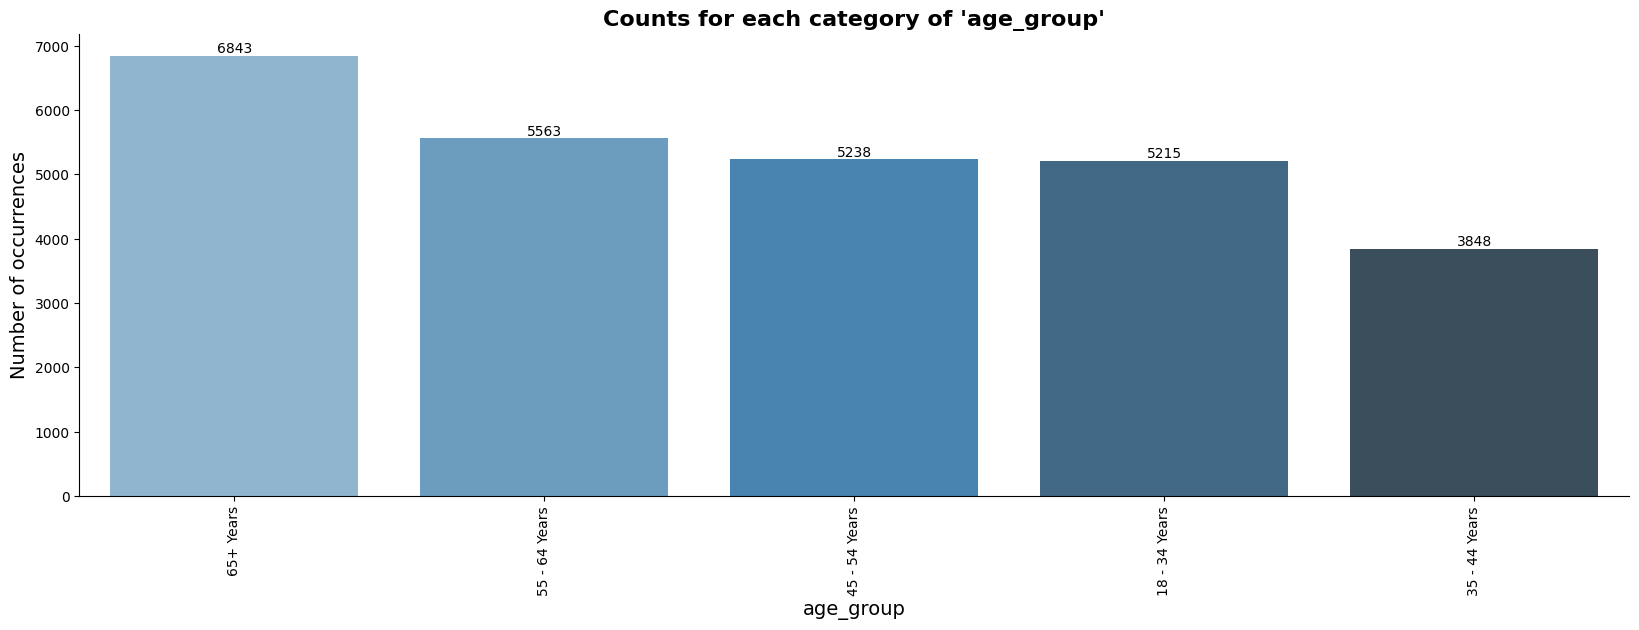

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


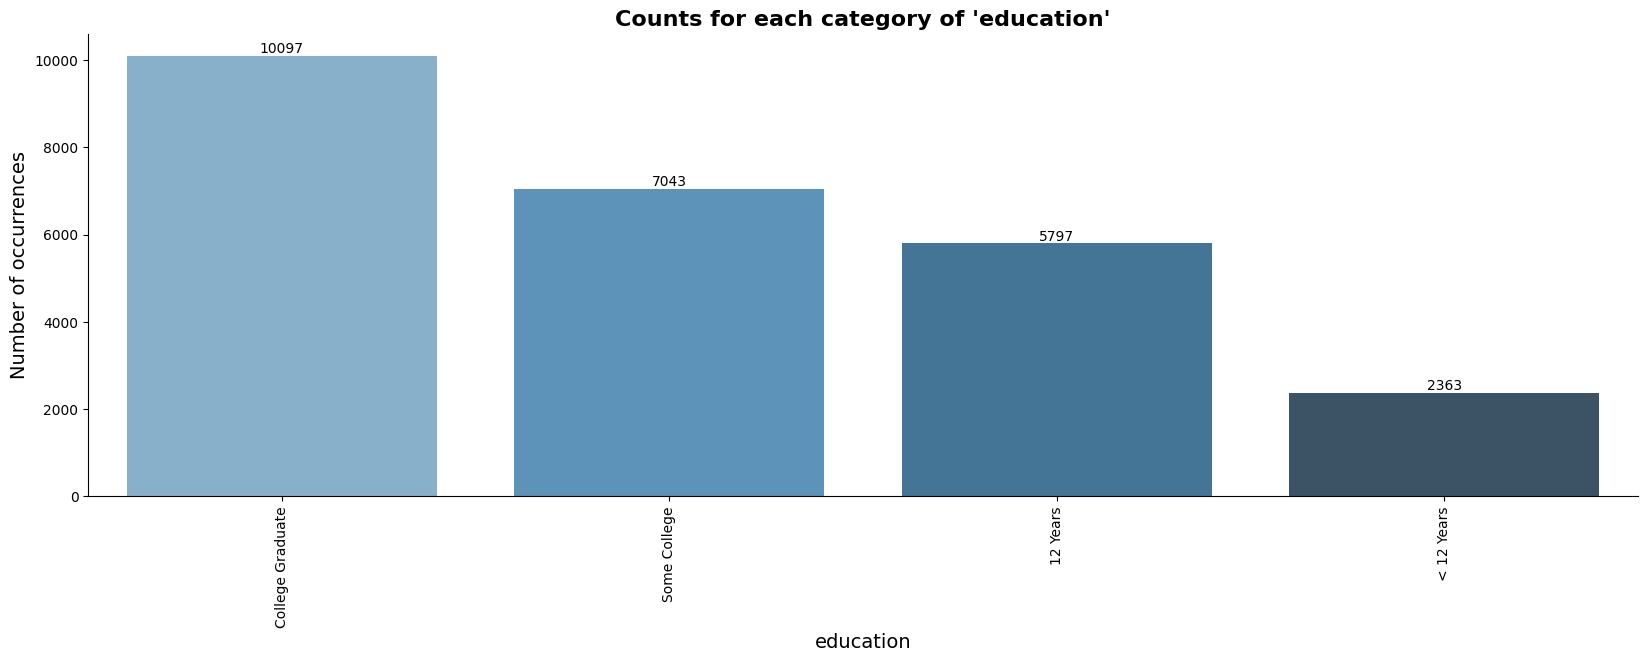

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


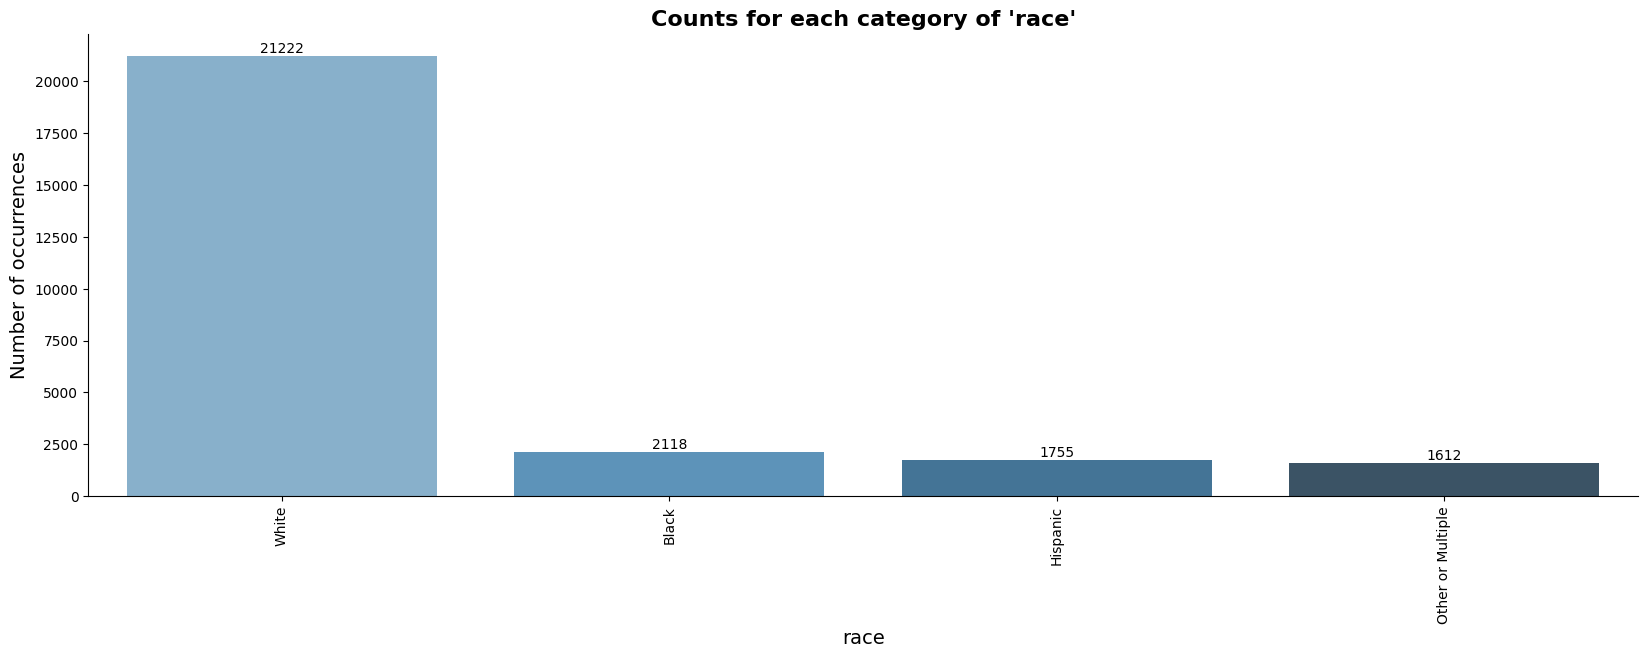

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


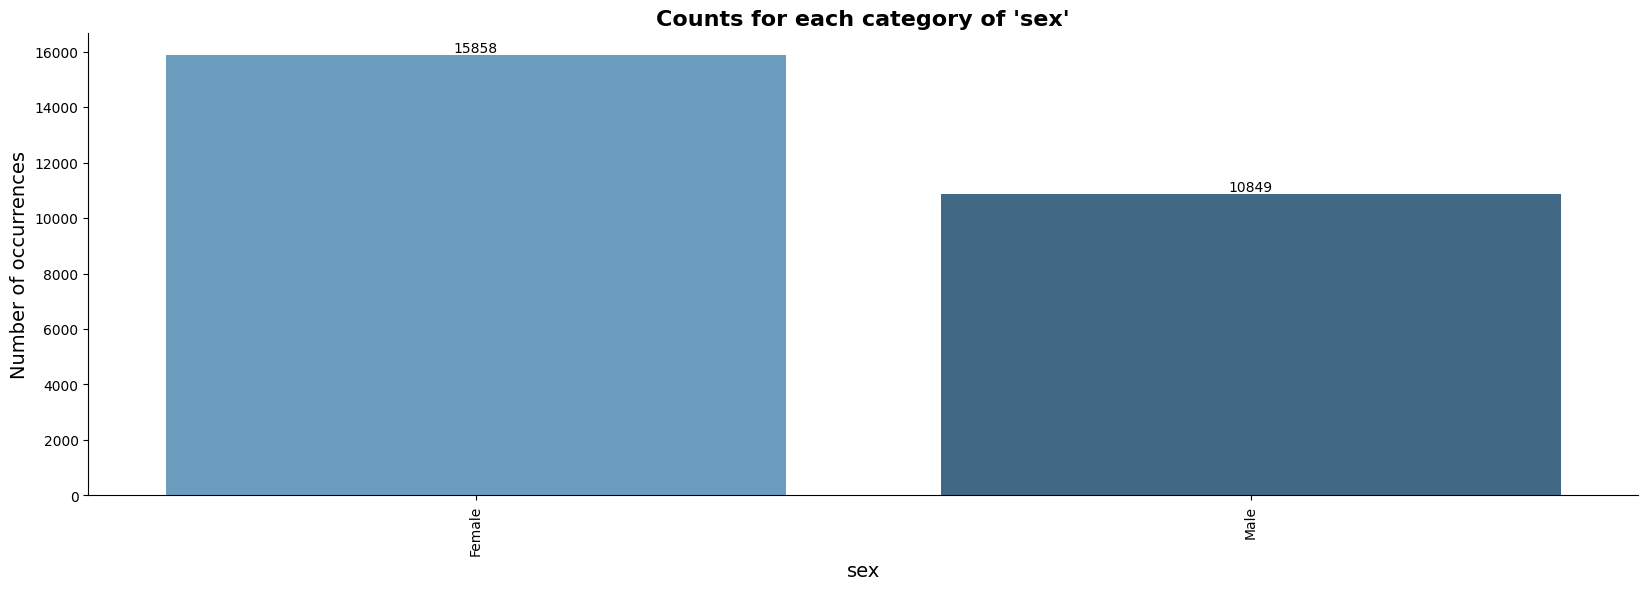

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


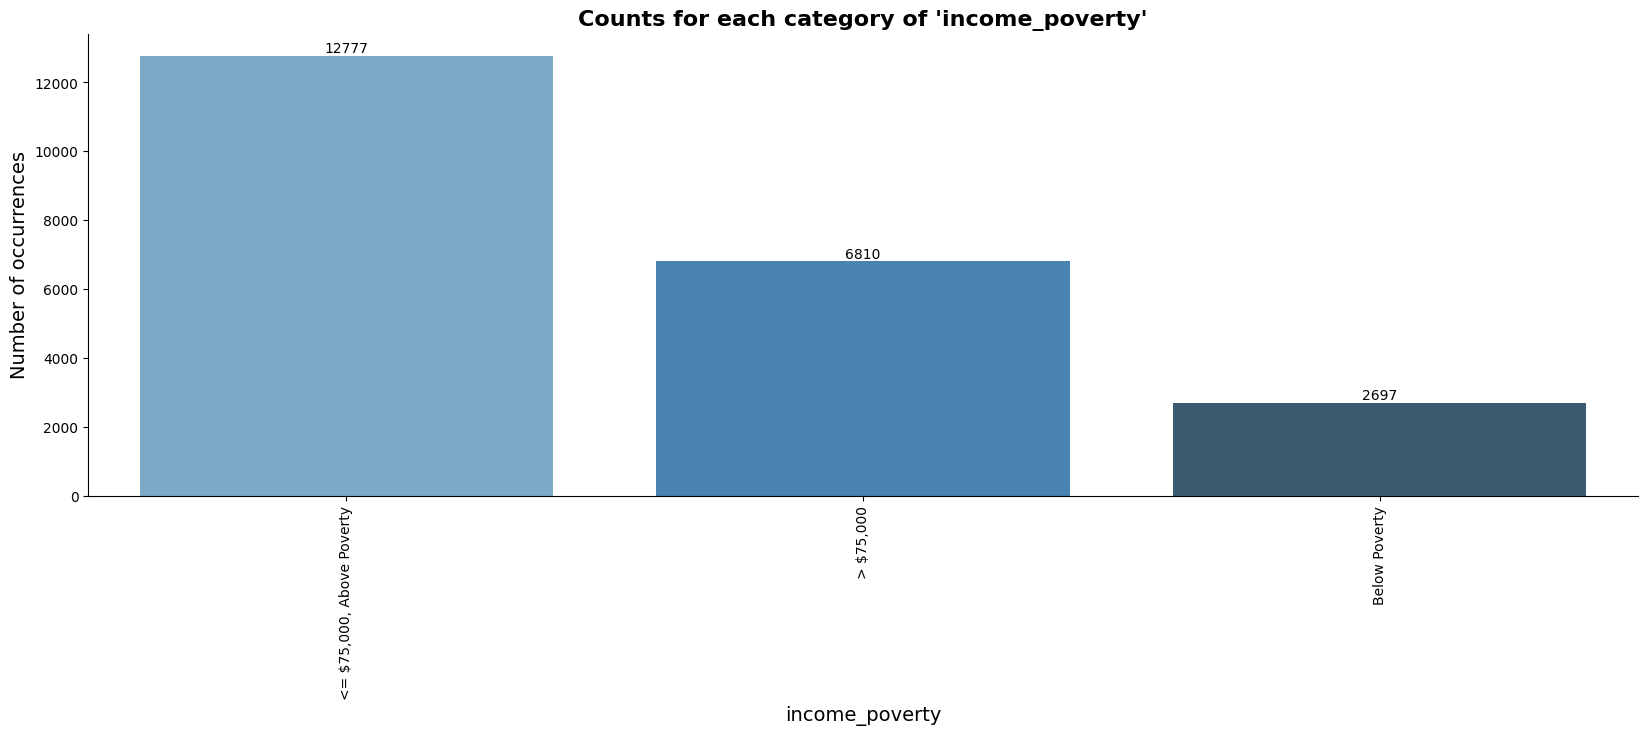

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


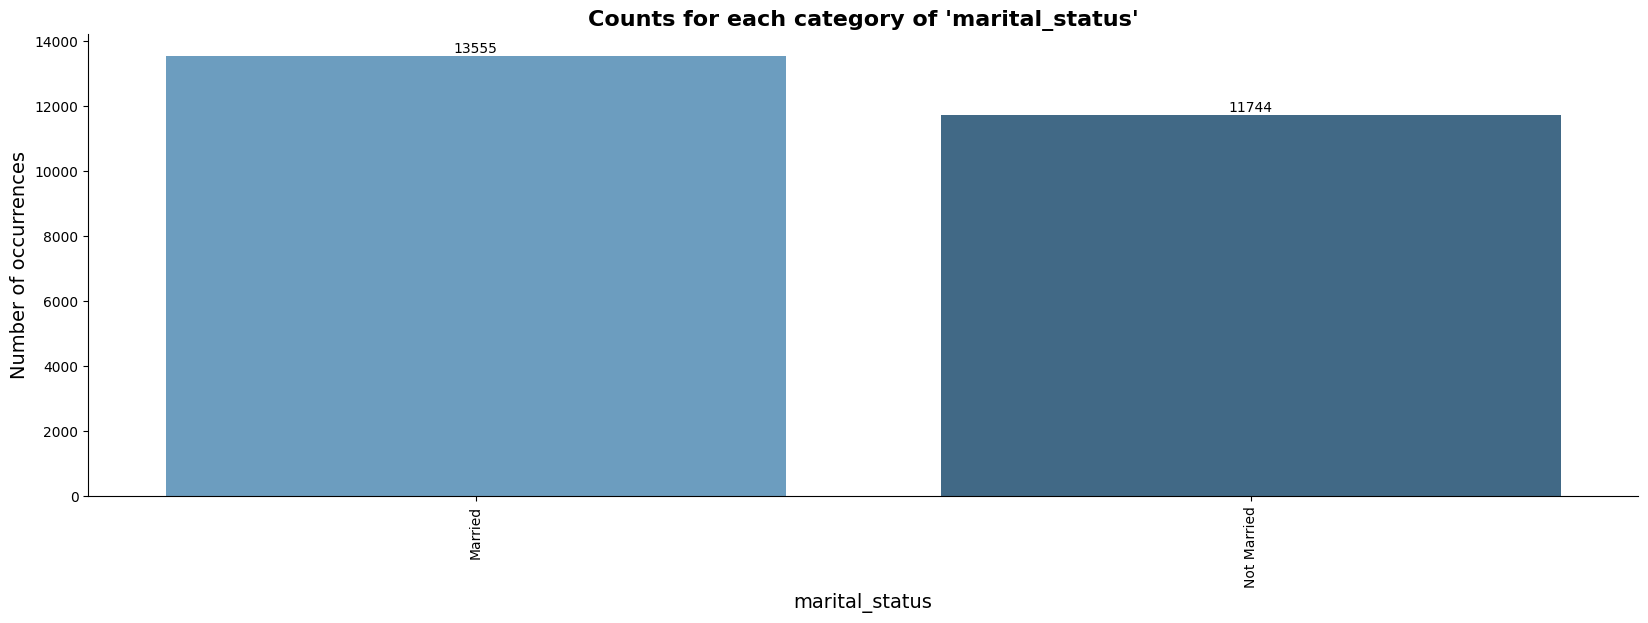

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


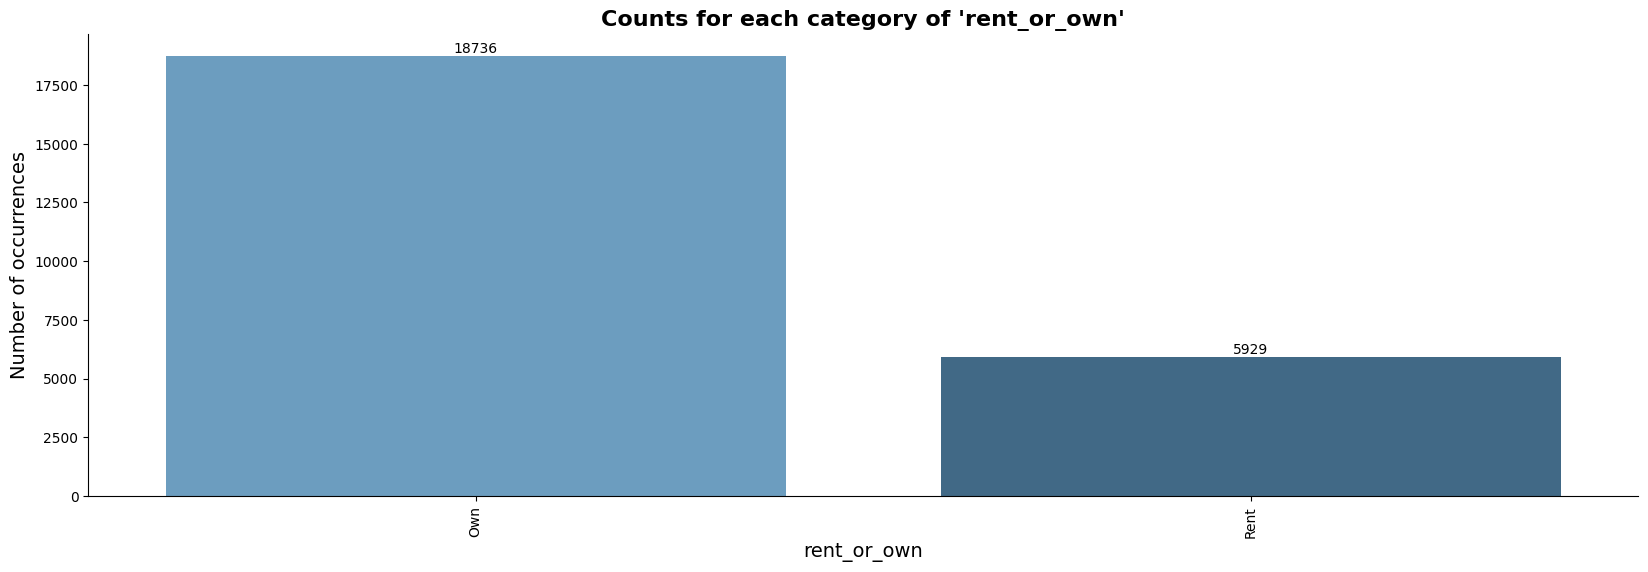

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


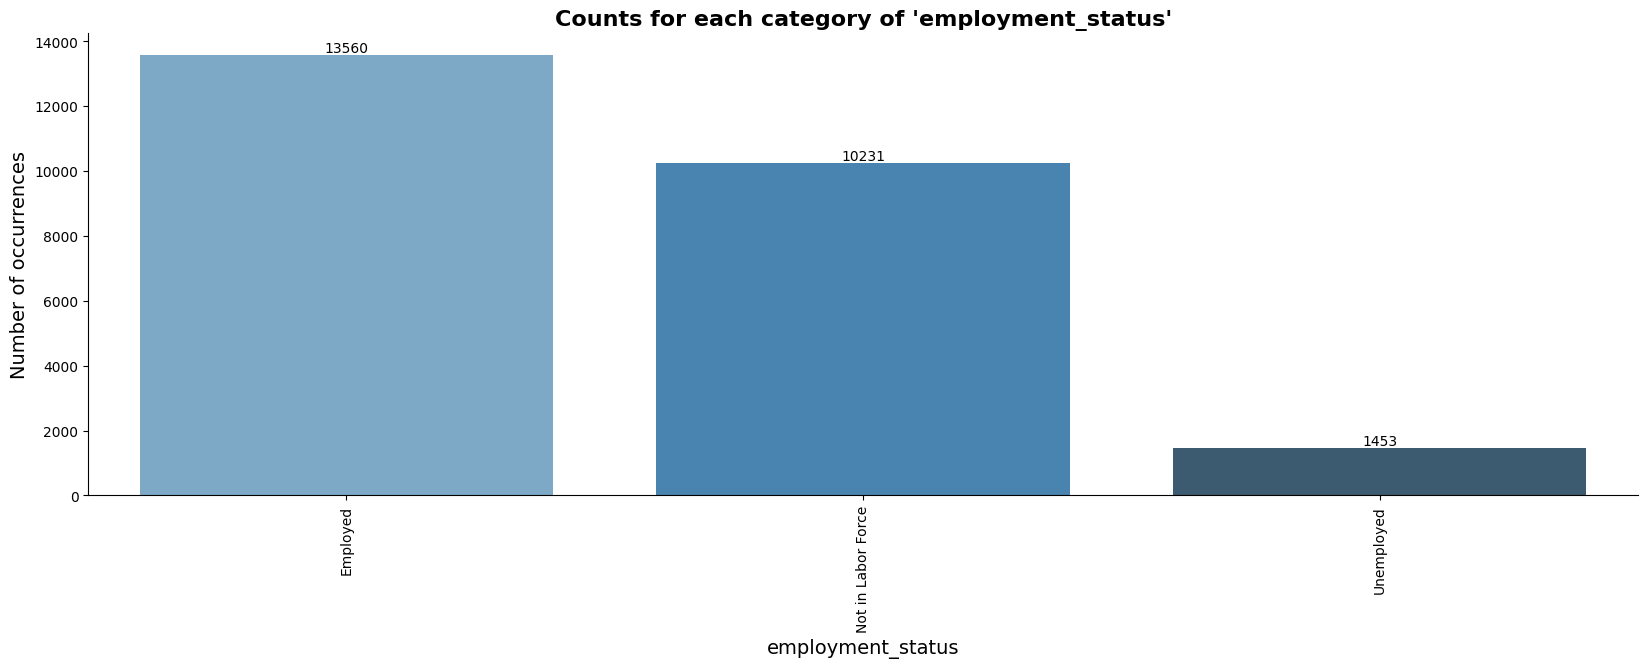

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


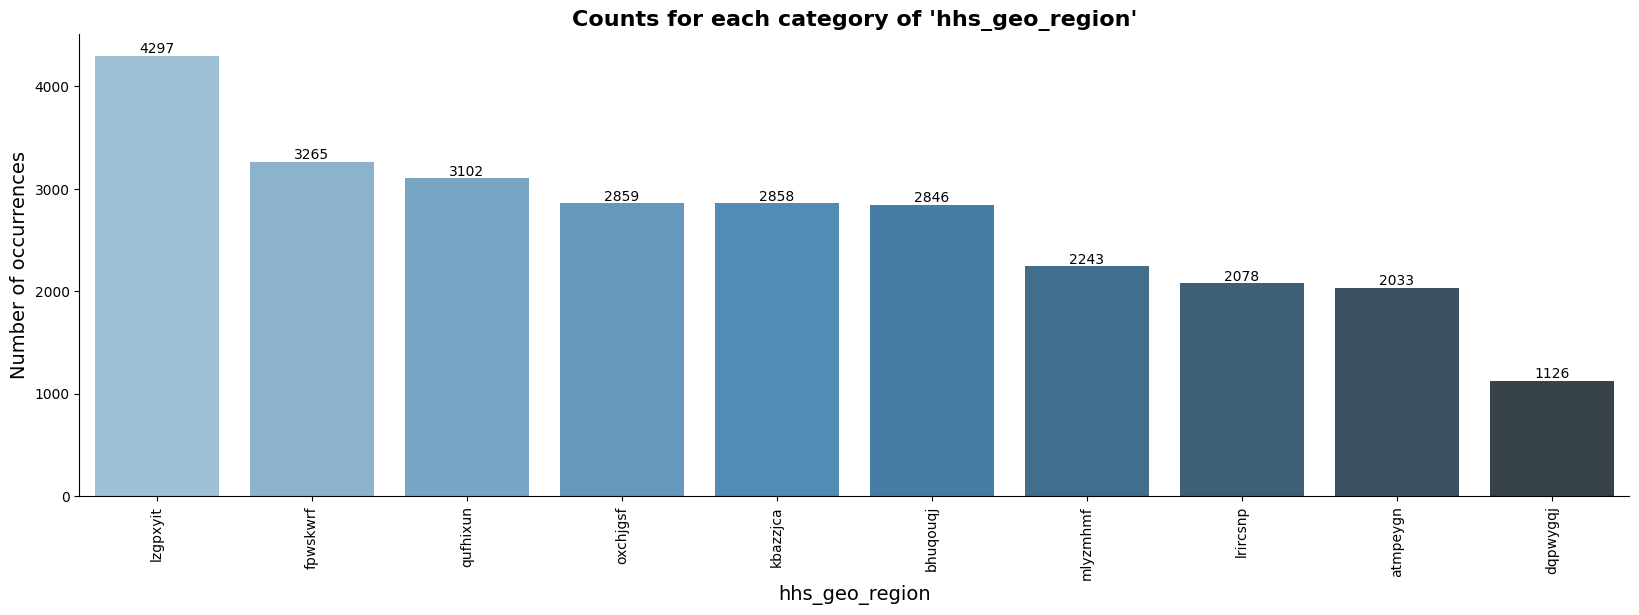

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


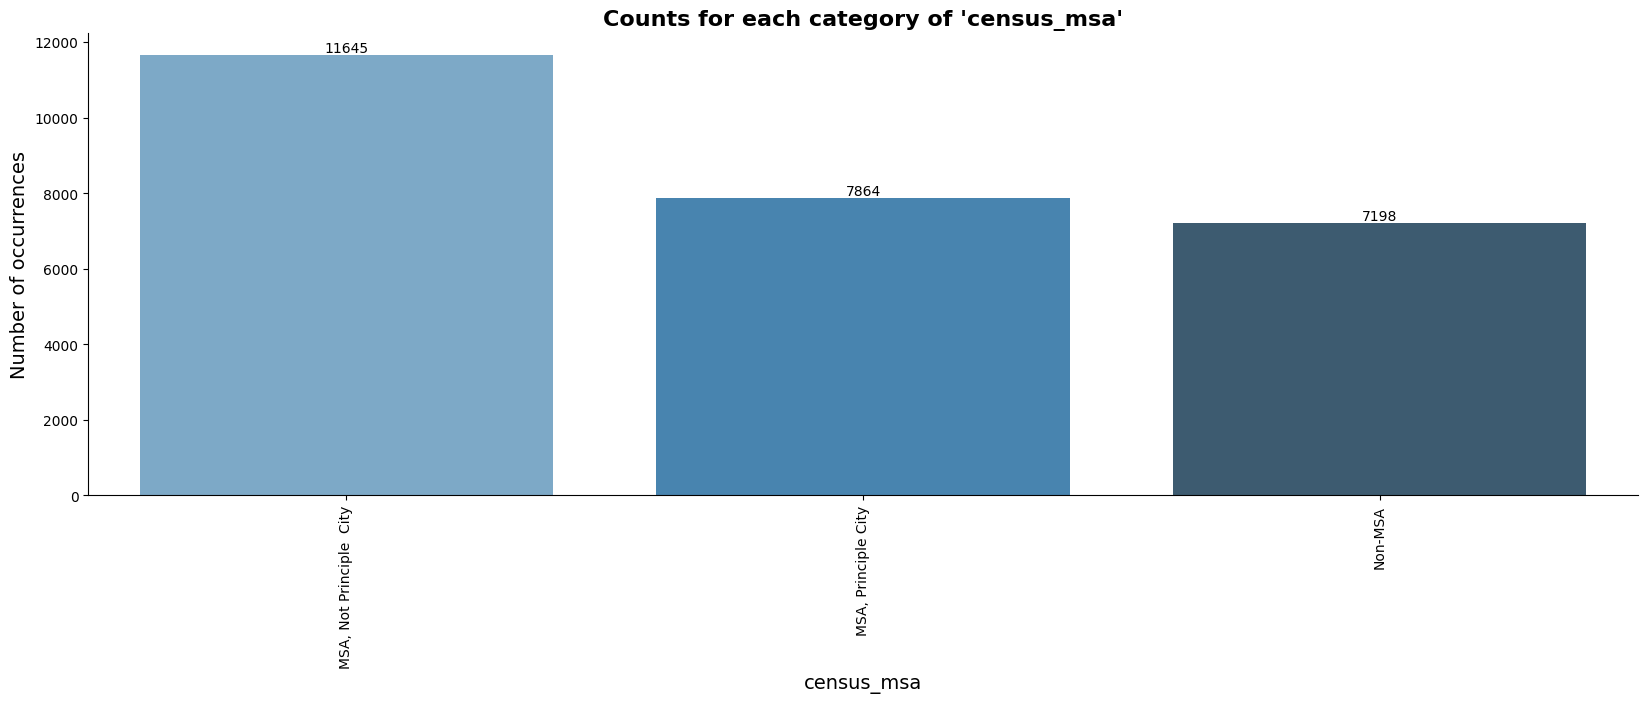

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


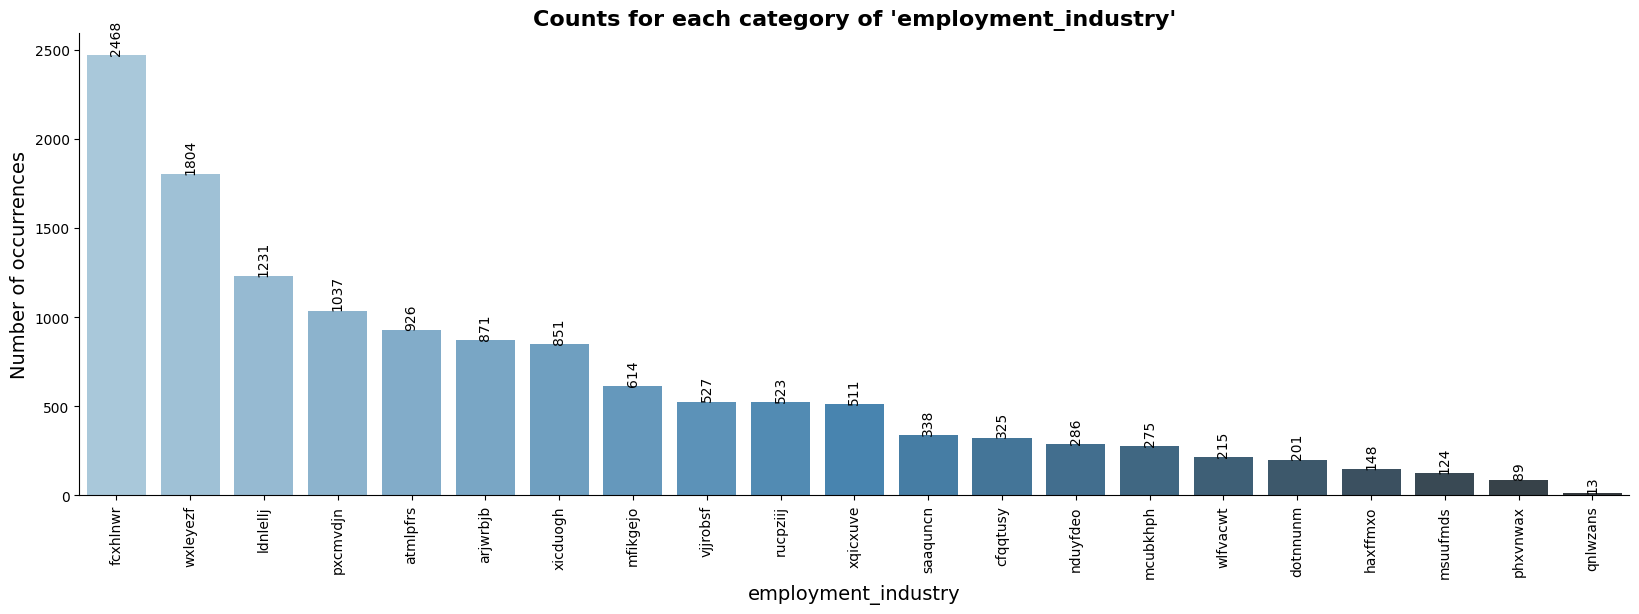

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


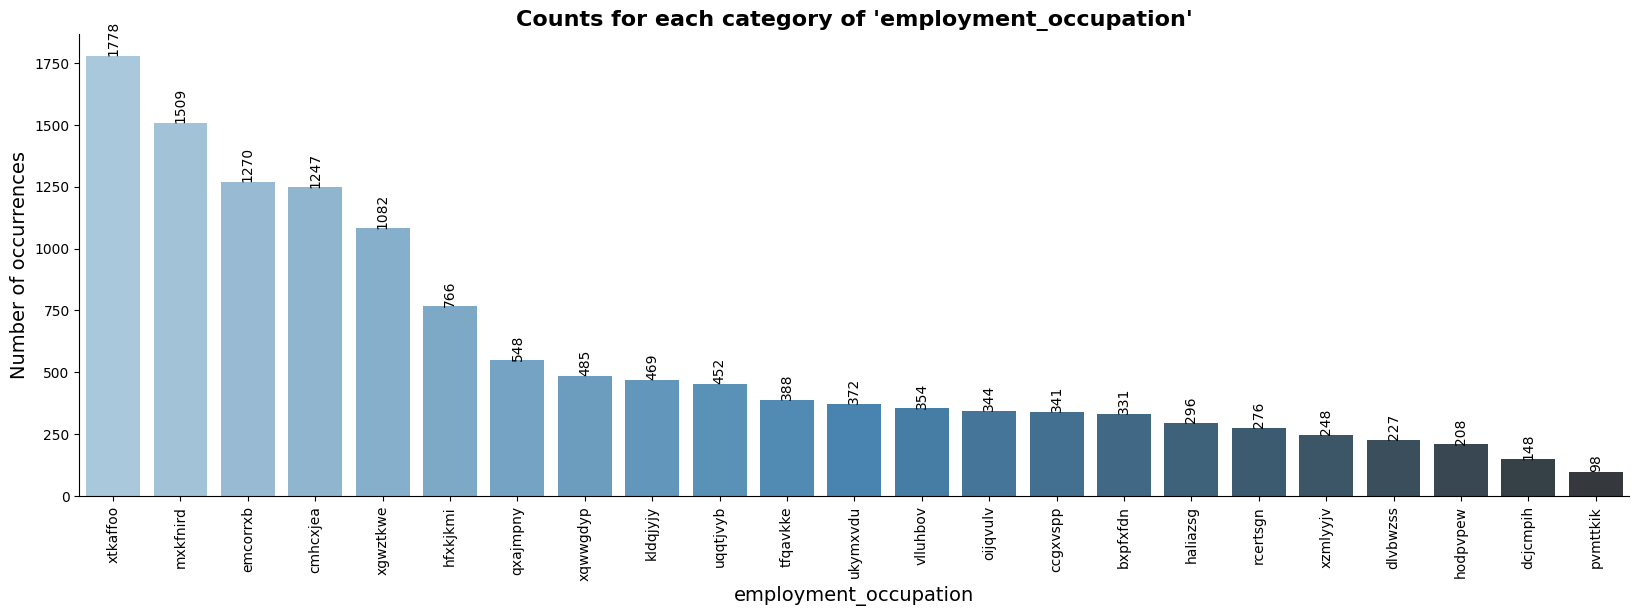

In [ ]:
for col in object_columns:

    # Set the figure size for each plot
    plt.figure(figsize=(20, 6))

    # Get the counts of each category and order them
    counts = df_train[col].value_counts()
    order = counts.index

    # Plot the count plot using Seaborn with a blue color palette
    ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")

    # Set the title and labels for the plot
    ax.set_title(f"Counts for each category of '{col}'", fontsize=16, fontweight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Number of occurrences", fontsize=14)

    # Rotate the x-axis labels if needed to make them readable
    plt.xticks(rotation=90, fontsize=10)

    # Remove the top and right borders for a cleaner look
    sns.despine()

    # Conditionally annotate the bars with the corresponding count values
    for p in ax.patches:
        height = p.get_height()  # Get the height (count) of each bar
        if len(order) > 10:  # If there are more than 10 bars, rotate the annotation
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
                        ha='center', va='bottom', fontsize=10, rotation=90)  # Rotate by 90 degrees
        else:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
                        ha='center', va='bottom', fontsize=10)  # No rotation

    # Show the plot
    plt.show()

In [ ]:
numeric_columns=numeric_columns.drop(['respondent_id'])

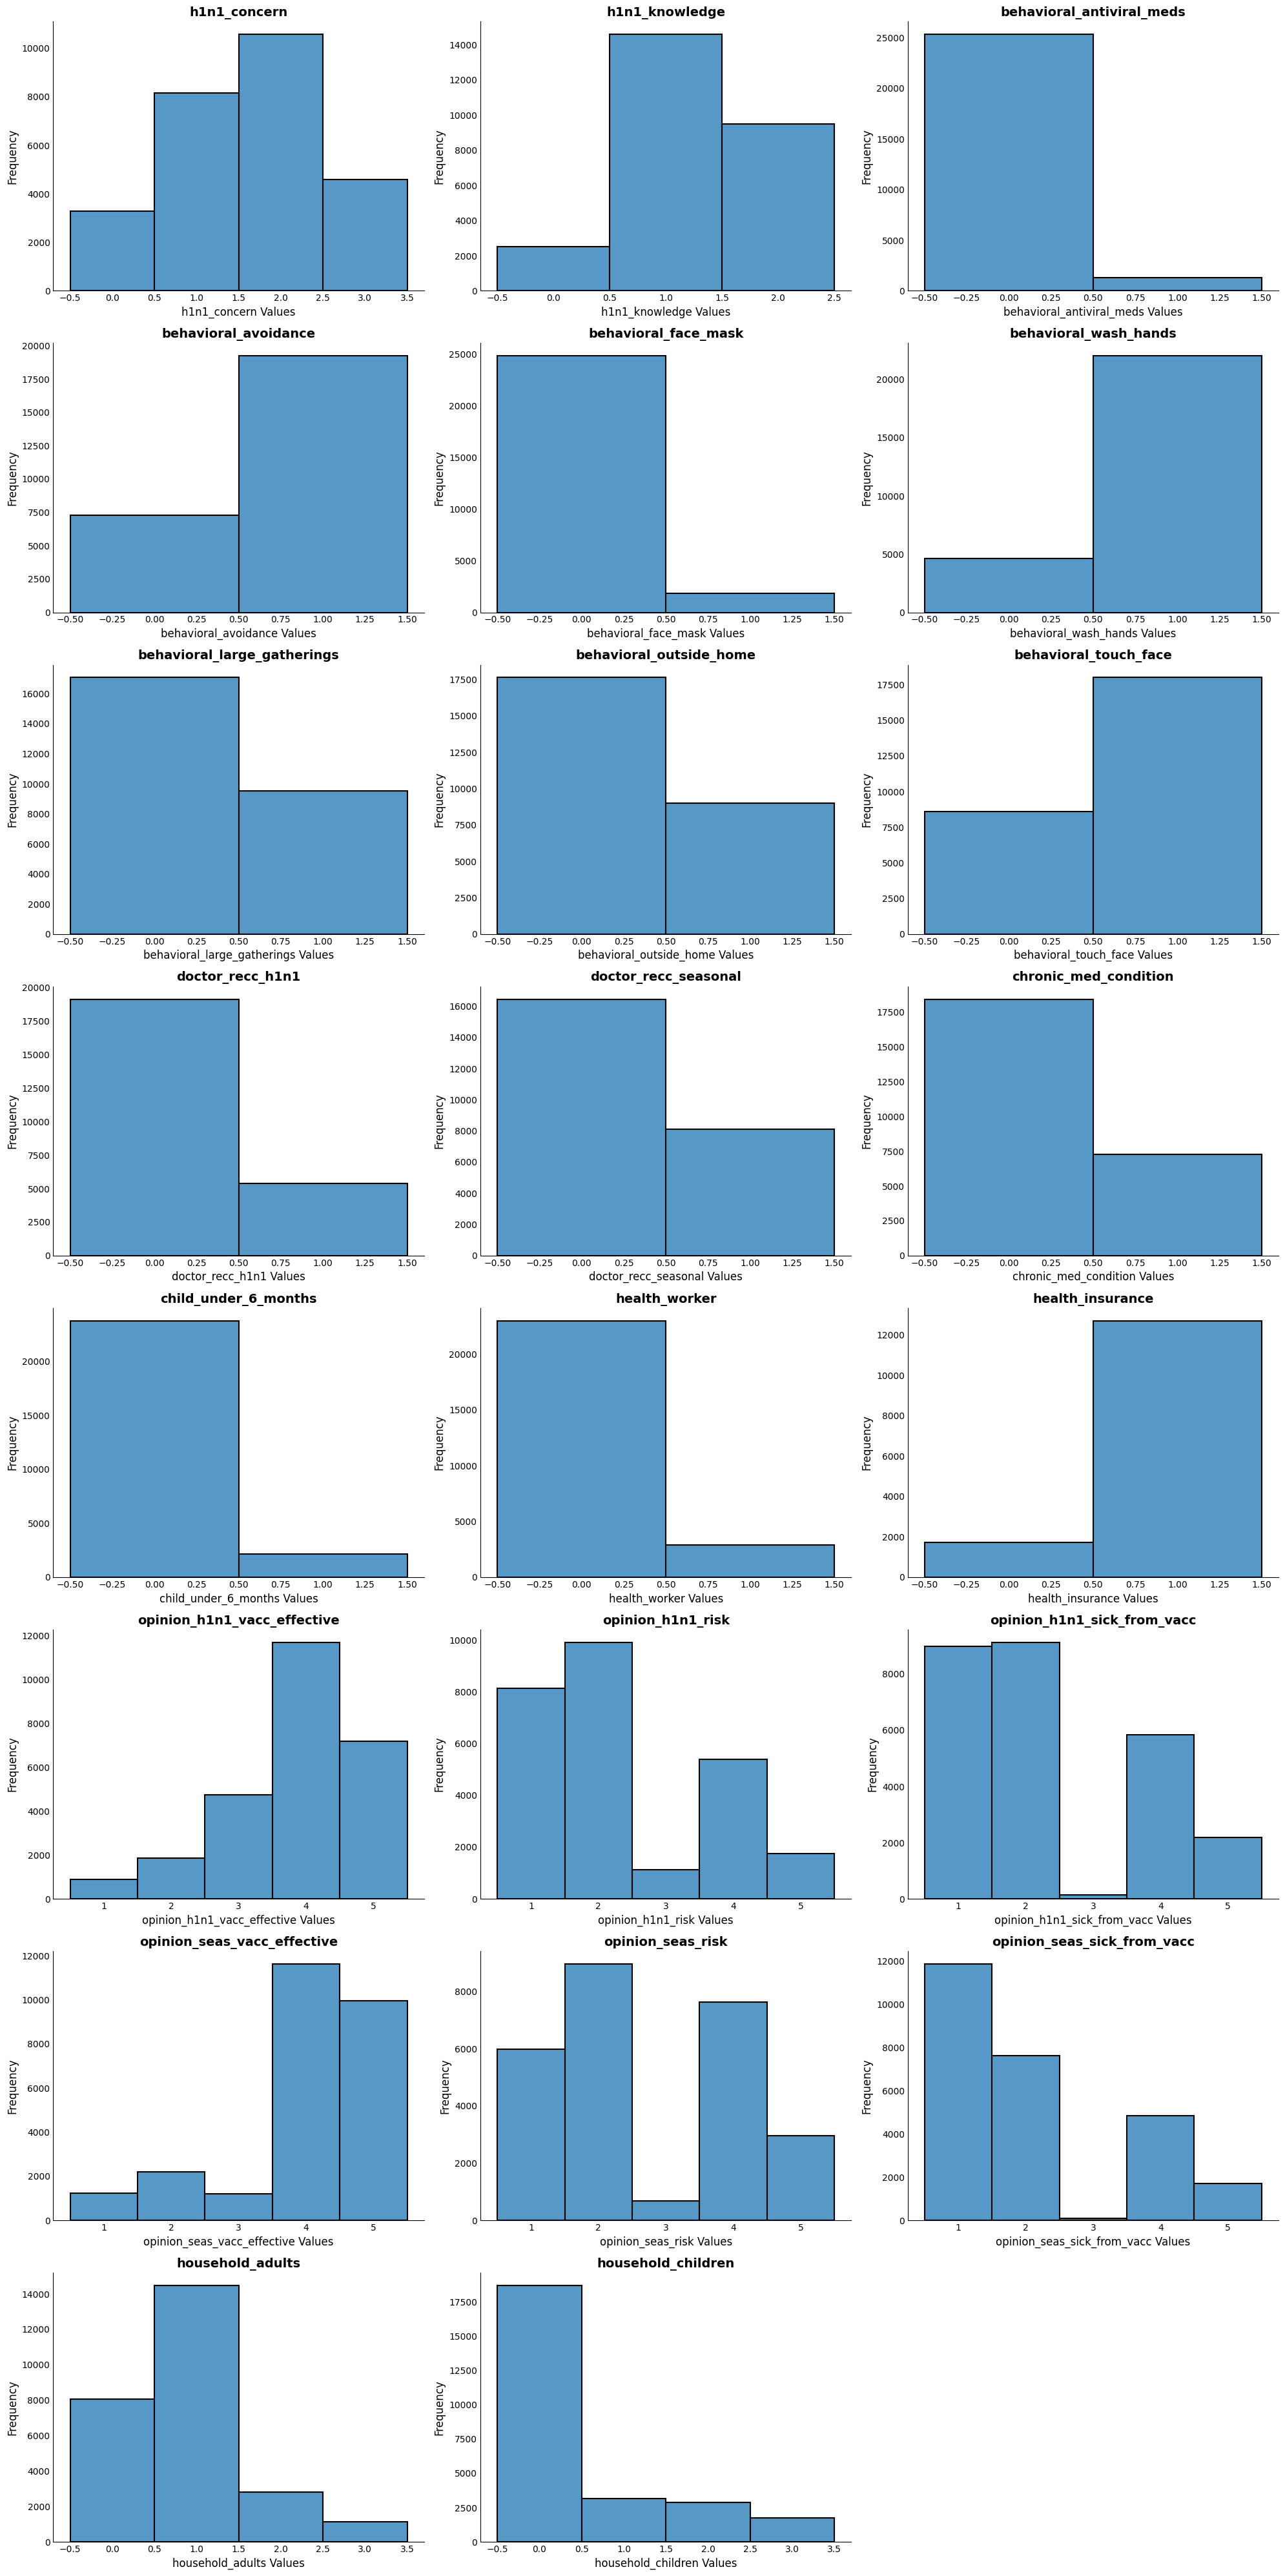

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of rows and columns required for the subplot grid
num_vars = len(numeric_columns)  # Total number of numeric variables
num_cols = 3  # You can adjust this number based on your preferences
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed to fit all plots

# Create the grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a histogram for each numeric variable with customized bins and styling
for ax, col in zip(axes, numeric_columns):
    # Determine the number of bins: use the number of unique values, except for 'CGPA'
    #if col == 'CGPA':
    #    bins = 30  # Set a fixed number of bins for CGPA
    #else:
    bins = len(df_train[col].unique())  # Set bins equal to the number of unique values

    # Plot the histogram with Seaborn's histplot (no KDE line yet)
    sns.histplot(df_train[col], bins=bins, ax=ax, kde=False, edgecolor="black",
                 linewidth=1.5, discrete=True)

    # Get the current axes and the lines from the KDE plot
    for line in ax.lines:
        # Adjust the KDE line properties: set color and linewidth
        if isinstance(line, plt.Line2D):  # Ensure it is a line (the KDE line is a Line2D object)
            line.set_color('orange')  # Set KDE line color
            line.set_linewidth(2)  # Set KDE line width

    # Set the title and labels for a cleaner look
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{col} Values', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Remove grid and ticks for a cleaner look
    ax.grid(False)  # Disable gridlines
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks

    # Remove the frame (spines) around the plot
    #for spine in ax.spines.values():
    #    spine.set_visible(False)
    spine = list(ax.spines.values())
    spine[3].set_visible(False)
    spine[1].set_visible(False)

# Remove unused subplots if the number of variables is less than the number of subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#See label output distribution
temp = pd.DataFrame([df_train_out['h1n1_vaccine'].value_counts(),df_train_out['seasonal_vaccine'].value_counts()],index=['h1n1','season']  )
temp['percent']=temp.apply(lambda x: x[1]/x.sum()*100,axis=1)
#temp['percent']=temp['percent']/temp['percent'].sum()
temp

0      1    percent
h1n1    21033   5674  21.245366
season  14272  12435  46.560827

In [ ]:
df_train_hands=pd.concat([df_train,df_train_out],axis=1)

In [ ]:
df_trainh1=pd.concat([df_train_hands[colCOM],df_train_hands[colH1N1],df_train_hands['h1n1_vaccine']],axis=1)
df_trainsea=pd.concat([df_train_hands[colCOM],df_train_hands[colSEA],df_train_hands['seasonal_vaccine']],axis=1)

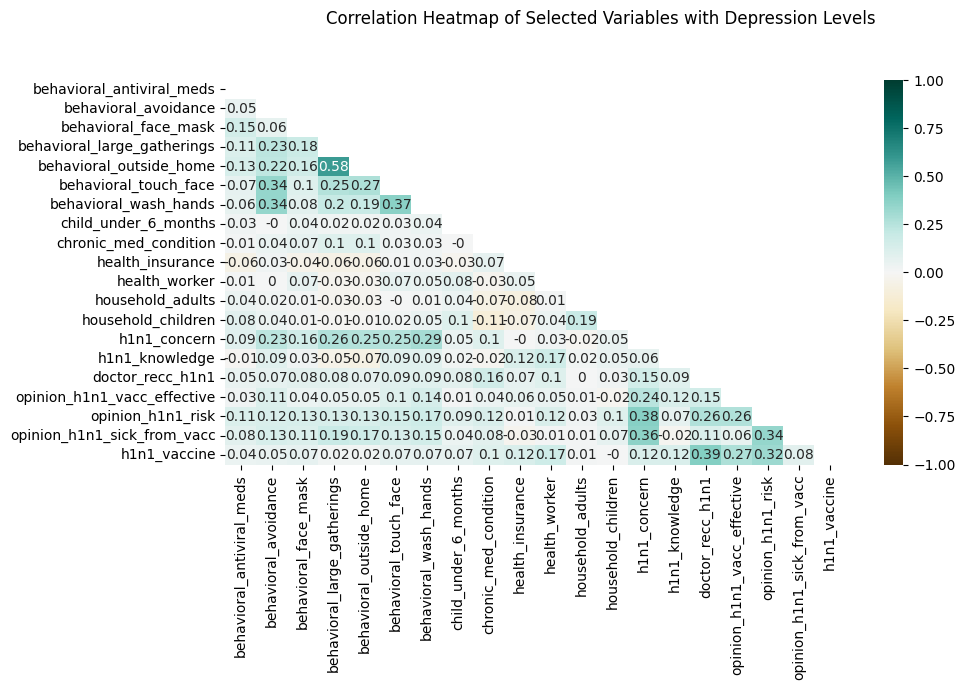

In [ ]:
# Calculate the correlation matrix and round to 2 decimal places
corr_matrix = df_trainh1.corr(numeric_only=True).round(2)

# Sort correlations of "h1n1_vaccine" in descending order
corr_with_depression = corr_matrix["h1n1_vaccine"].sort_values(ascending=False)

# Create the correlation heatmap
plt.figure(figsize=(10, 5))

# Mask the upper triangle of the heatmap (to avoid redundant values)
mask = np.triu(np.ones_like(corr_matrix))

# Create the heatmap with the selected colormap and annotations
sns.heatmap(corr_matrix, cmap='BrBG', mask=mask, vmin=-1, vmax=1, annot=True)

# Add title
plt.suptitle("Correlation Heatmap of Selected Variables with Depression Levels", y=1.02)  # Adjust y for spacing

# Show the plot
plt.show()

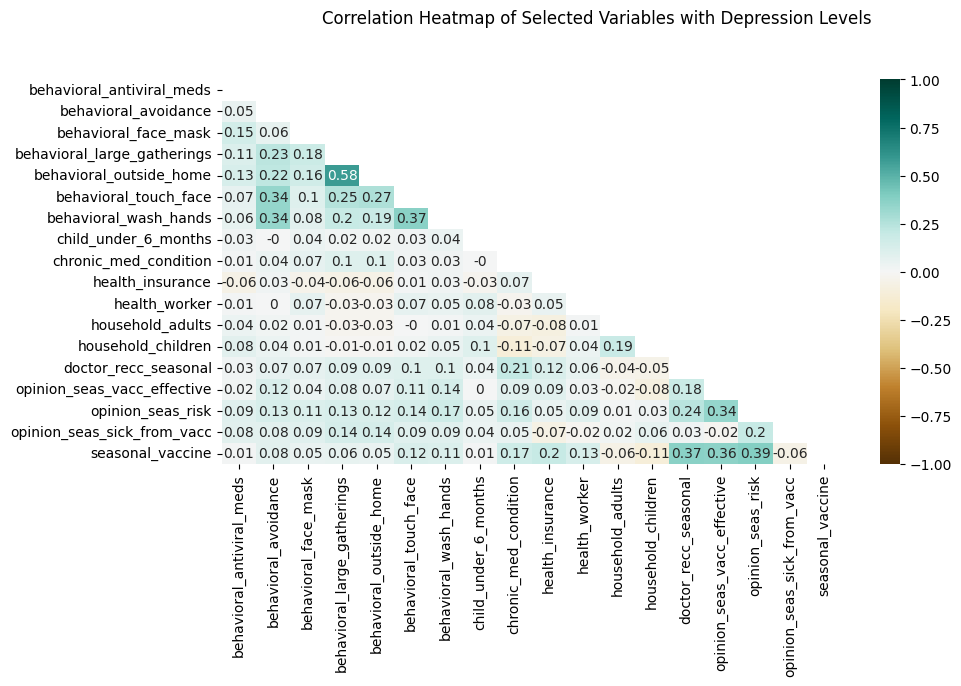

In [ ]:
# Calculate the correlation matrix and round to 2 decimal places
corr_matrix = df_trainsea.corr(numeric_only=True).round(2)

# Sort correlations of "h1n1_vaccine" in descending order
corr_with_depression = corr_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Create the correlation heatmap
plt.figure(figsize=(10, 5))

# Mask the upper triangle of the heatmap (to avoid redundant values)
mask = np.triu(np.ones_like(corr_matrix))

# Create the heatmap with the selected colormap and annotations
sns.heatmap(corr_matrix, cmap='BrBG', mask=mask, vmin=-1, vmax=1, annot=True)

# Add title
plt.suptitle("Correlation Heatmap of Selected Variables with Depression Levels", y=1.02)  # Adjust y for spacing

# Show the plot
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
df_trainsea[df_trainsea.isna().any(axis=1)][:5]



age_group  behavioral_antiviral_meds  behavioral_avoidance  \
0  55 - 64 Years                        0.0                   0.0   
2  18 - 34 Years                        0.0                   1.0   
3      65+ Years                        0.0                   1.0   
4  45 - 54 Years                        0.0                   1.0   
5      65+ Years                        0.0                   1.0   

   behavioral_face_mask  behavioral_large_gatherings  behavioral_outside_home  \
0                   0.0                          0.0                      1.0   
2                   0.0                          0.0                      0.0   
3                   0.0                          1.0                      0.0   
4                   0.0                          1.0                      0.0   
5                   0.0                          0.0                      0.0   

   behavioral_touch_face  behavioral_wash_hands                census_msa  \
0                    1.0                    0.0                   Non-MSA   
2                    0.0                    0.0  MSA, Not Principle  City   
3                    0.0                    1.0       MSA, Principle City   
4                    1.0                    1.0  MSA, Not Principle  City   
5                    1.0                    1.0       MSA, Principle City   

   child_under_6_months  chronic_med_condition         education  \
0                   0.0                    0.0        < 12 Years   
2                   0.0                    1.0  College Graduate   
3                   0.0                    1.0          12 Years   
4                   0.0                    0.0      Some College   
5                   0.0                    0.0          12 Years   

  employment_industry employment_occupation   employment_status  \
0                 NaN                   NaN  Not in Labor Force   
2            rucpziij              xtkaffoo            Employed   
3                 NaN                   NaN  Not in Labor Force   
4            wxleyezf              emcorrxb            Employed   
5            saaquncn              vlluhbov            Employed   

   health_insurance  health_worker hhs_geo_region  household_adults  \
0               1.0            0.0       oxchjgsf               0.0   
2               NaN            0.0       qufhixun               2.0   
3               NaN            0.0       lrircsnp               0.0   
4               NaN            0.0       qufhixun               1.0   
5               NaN            0.0       atmpeygn               2.0   

   household_children             income_poverty marital_status   race  \
0                 0.0              Below Poverty    Not Married  White   
2                 0.0  <= $75,000, Above Poverty    Not Married  White   
3                 0.0              Below Poverty    Not Married  White   
4                 0.0  <= $75,000, Above Poverty        Married  White   
5                 3.0  <= $75,000, Above Poverty        Married  White   

  rent_or_own     sex  doctor_recc_seasonal  opinion_seas_vacc_effective  \
0         Own  Female                   0.0                          2.0   
2         Own    Male                   NaN                          4.0   
3        Rent  Female                   1.0                          5.0   
4         Own  Female                   0.0                          3.0   
5         Own    Male                   1.0                          5.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  seasonal_vaccine  
0                1.0                          2.0                 0  
2                1.0                          2.0                 0  
3                4.0                          1.0                 1  
4                1.0                          4.0                 0  
5                4.0                          4.0                 0

In [ ]:
df_trainh1.columns.intersection(object_columns).to_list()

['age_group',
 'census_msa',
 'education',
 'employment_industry',
 'employment_occupation',
 'employment_status',
 'hhs_geo_region',
 'income_poverty',
 'marital_status',
 'race',
 'rent_or_own',
 'sex']

In [ ]:
df_trainh1.columns

Index(['age_group', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'census_msa', 'child_under_6_months',
       'chronic_med_condition', 'education', 'employment_industry',
       'employment_occupation', 'employment_status', 'health_insurance',
       'health_worker', 'hhs_geo_region', 'household_adults',
       'household_children', 'income_poverty', 'marital_status', 'race',
       'rent_or_own', 'sex', 'h1n1_concern', 'h1n1_knowledge',
       'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
#using catboost
from catboost import CatBoostClassifier, Pool
from catboost import cv
from IPython.display import SVG

cat_features = df_trainh1.columns.to_list()
cat_features.remove('h1n1_vaccine')
#cat_cols = list(df.select_dtypes(include=["object", "category"]).columns)
#df[cat_cols] = df[cat_cols].astype(str)
X = df_trainh1.astype('category')
X = X.astype(str)
#X.fillna("__NA__", inplace=True)
y = X['h1n1_vaccine']
X = X.drop(['h1n1_vaccine'],axis=1)
#y = df_trainh1['h1n1_vaccine']
params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 1000
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.03

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed =3,
    plot=True,
    plot_file='metrics.svg',
    stratified=True,
    early_stopping_rounds=20,
    return_models=True,
    verbose=False
)

display(SVG('./metrics.svg'))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3470847078
bestIteration = 370

Training on fold [1/5]

bestTest = 0.350048576
bestIteration = 530

Training on fold [2/5]

bestTest = 0.3415410953
bestIteration = 608

Training on fold [3/5]

bestTest = 0.3449632049
bestIteration = 858

Training on fold [4/5]

bestTest = 0.3453494117
bestIteration = 530



In [ ]:
cv

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0             0           0.669734          0.000085            0.669721   
1             1           0.646977          0.000201            0.646941   
2             2           0.627119          0.000951            0.627045   
3             3           0.607828          0.001599            0.607837   
4             4           0.590320          0.001032            0.590302   
..          ...                ...               ...                 ...   
874         874           0.345840          0.003112            0.319968   
875         875           0.345841          0.003111            0.319965   
876         876           0.345841          0.003112            0.319961   
877         877           0.345839          0.003112            0.319950   
878         878           0.345839          0.003112            0.319947   

     train-Logloss-std  test-AUC-mean  test-AUC-std  
0             0.000089       0.828964      0.004742  
1             0.000165       0.839075      0.003532  
2             0.000708       0.841711      0.005023  
3             0.001199       0.842990      0.006281  
4             0.000693       0.843493      0.005405  
..                 ...            ...           ...  
874           0.006678       0.867132      0.002712  
875           0.006685       0.867131      0.002712  
876           0.006691       0.867131      0.002712  
877           0.006714       0.867132      0.002713  
878           0.006719       0.867132      0.002713  

[879 rows x 7 columns]

In [ ]:
cv_data[0]['test-Logloss-mean'].min()
best_value = np.min(cv_data[0]['test-Logloss-mean'])
best_iter = np.argmin(cv_data[0]['test-Logloss-mean'])


print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data[0]['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, stratified: 0.3458±0.0031 on step 858


In [ ]:
for i in range(5):
  print(model_list[i].get_feature_importance(prettified=True)[:5])

                    Feature Id  Importances
0             health_insurance    18.541058
1             doctor_recc_h1n1    18.054200
2            opinion_h1n1_risk    15.401224
3  opinion_h1n1_vacc_effective    13.236792
4                health_worker     5.216379
                    Feature Id  Importances
0             health_insurance    18.381160
1             doctor_recc_h1n1    16.777376
2            opinion_h1n1_risk    14.266505
3  opinion_h1n1_vacc_effective    13.300973
4                health_worker     4.468026
                    Feature Id  Importances
0             health_insurance    17.809405
1             doctor_recc_h1n1    15.280919
2            opinion_h1n1_risk    13.750631
3  opinion_h1n1_vacc_effective    12.297780
4                health_worker     4.401818
                    Feature Id  Importances
0             doctor_recc_h1n1    17.030421
1             health_insurance    15.768960
2            opinion_h1n1_risk    13.550977
3  opinion_h1n1_vacc_effective  

In [ ]:
shap_values = model_list[0].get_feature_importance(Pool(X, label=y, cat_features=cat_features), type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(26707, 31)


In [ ]:
model_list[0].tree_count_

391

In [ ]:
model_list[0].predict(X)

array([-2.84565275,  0.1288259 , -4.45600732, ..., -2.59840591,
       -3.40837602, -1.08999394])

In [ ]:
raw_pred=model_list[0].predict(X,prediction_type='RawFormulaVal')

In [ ]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.05490647 0.53216201 0.01147541 ... 0.06924108 0.03203472 0.25161942]


In [ ]:
model_list[0].save_model('catboost_h1cvmodel0.bin')

In [ ]:
model_list[4].get_params()

In [ ]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X.iloc[3,:])
#from google.colab import output
#output.disable_custom_widget_manager()

In [ ]:
shap.initjs()
shap.force_plot(expected_value, shap_values[2104,:], X.iloc[2104,:])

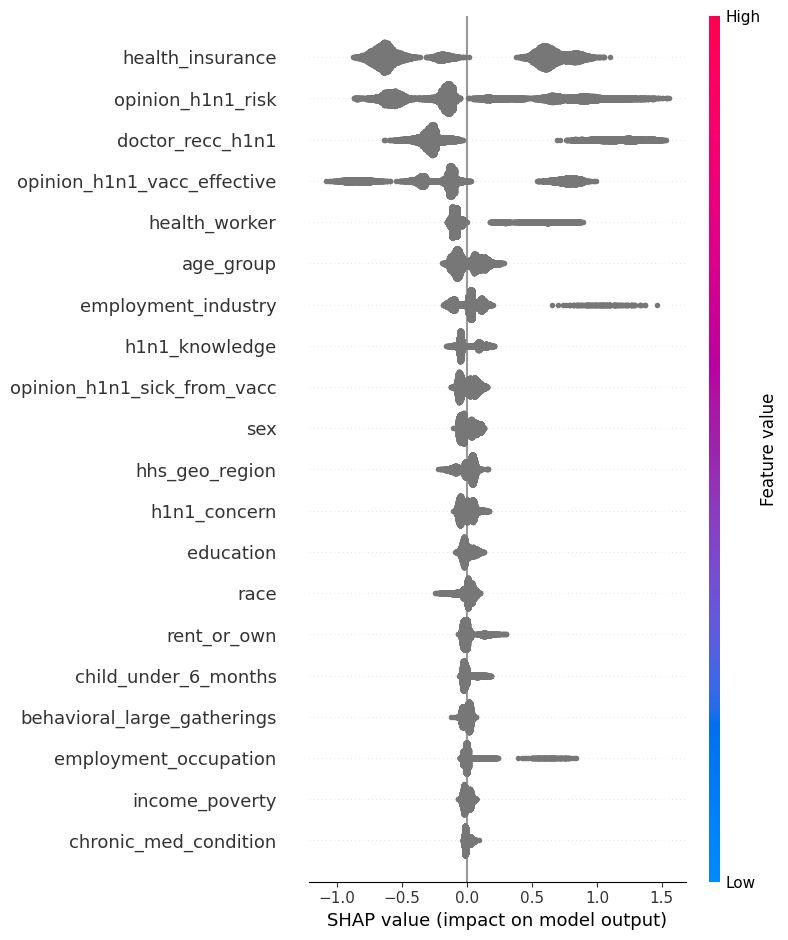

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
X_small = X.iloc[0:200]
shap_small = shap_values[:200]
shap.initjs()
shap.force_plot(expected_value, shap_small, X_small)

In [ ]:
df_trainh1.to_csv('trainh1.tsv',sep='\t',index=False)
df_trainsea.to_csv('trainsea.tsv',sep='\t',index=False)

In [ ]:
!cat trainh1.tsv | head -n 5

In [ ]:
from catboost.utils import create_cd
feature_names = dict()
for column, name in enumerate(df_trainh1):
    if column == 31:
        continue
    feature_names[column] = name

create_cd(
    label=31,
    cat_features=list(range(31)),
    feature_names=feature_names,
    output_path='./trainh1.cd')
feature_names={}
for column, name in enumerate(df_trainsea):
    if column == 29:
        continue
    feature_names[column] = name

create_cd(
    label=29,
    cat_features=list(range(29)),
    feature_names=feature_names,
    output_path='./trainsea.cd')


In [ ]:
!cat ./trainsea.cd

0	Categ	age_group
1	Categ	behavioral_antiviral_meds
2	Categ	behavioral_avoidance
3	Categ	behavioral_face_mask
4	Categ	behavioral_large_gatherings
5	Categ	behavioral_outside_home
6	Categ	behavioral_touch_face
7	Categ	behavioral_wash_hands
8	Categ	census_msa
9	Categ	child_under_6_months
10	Categ	chronic_med_condition
11	Categ	education
12	Categ	employment_industry
13	Categ	employment_occupation
14	Categ	employment_status
15	Categ	health_insurance
16	Categ	health_worker
17	Categ	hhs_geo_region
18	Categ	household_adults
19	Categ	household_children
20	Categ	income_poverty
21	Categ	marital_status
22	Categ	race
23	Categ	rent_or_own
24	Categ	sex
25	Categ	doctor_recc_seasonal
26	Categ	opinion_seas_vacc_effective
27	Categ	opinion_seas_risk
28	Categ	opinion_seas_sick_from_vacc
29	Label	


In [ ]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20, # 2000
                'learning_rate': 0.5, # we set big learning_rate,
                                      # because we have small
                                      # #iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'Logloss',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('trainh1.csv',
                               delimiter=',',
                               fold_size=10000, # <= 50% of dataset
                               fold_count=20,
                               column_description='trainh1.cd',
                               partition_random_seed=0,
                               has_header=True,
                               #working_dir=...
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'AUC'],
                                 features_to_eval=[12,13,15,16,27,28,29])   #emp_ind,emp_occ,health_insurance,health_worker,doctor_rec,opinion_effective,opinion_risk

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 27  0.000089  11.293822       11.037005       11.516546     GOOD
Features: 29  0.000089   7.681167        7.466156        7.877657     GOOD
Features: 15  0.000089   7.276325        7.091245        7.460988     GOOD
Features: 28  0.000089   6.871453        6.667956        7.055410     GOOD
Features: 12  0.000089   2.066924        1.880051        2.239582     GOOD
Features: 13  0.000089   1.680486        1.532883        1.815715     GOOD
Features: 16  0.000089   1.576418        1.379046        1.760655     GOOD

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('AUC')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 16  0.000089   2.928708        2.536489        3.173139     GOOD
Features: 13  0.000089   2.990601        2.671619        3.305736     GOOD
Features: 12  0.000089   3.863073        3.527016        4.205824     GOOD
Features: 28  0.000089  12.285519       11.957083       12.630827     GOOD
Features: 15  0.000089  12.680213       12.355498       13.060256     GOOD
Features: 29  0.000089  12.868304       12.521150       13.215748     GOOD
Features: 27  0.000089  16.127290       15.759863       16.493497     GOOD

In [ ]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20, # 2000
                'learning_rate': 0.5, # we set big learning_rate,
                                      # because we have small
                                      # #iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'Logloss',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('trainsea.csv',
                               delimiter=',',
                               fold_size=10000, # <= 50% of dataset
                               fold_count=20,
                               column_description='trainsea.cd',
                               partition_random_seed=0,
                               has_header=True,
                               #working_dir=...
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'AUC'],
                                 features_to_eval=[12,13,15,16,25,26,27])   #emp_ind,emp_occ,health_insurance,health_worker,doctor_rec,opinion_effective,opinion_risk

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 27  0.000089  12.176675       11.820549       12.468538     GOOD
Features: 26  0.000089   9.653122        9.500964        9.788344     GOOD
Features: 25  0.000089   7.330528        7.152967        7.493311     GOOD
Features: 12  0.000089   1.972480        1.765222        2.192857     GOOD
Features: 13  0.000089   1.610235        1.479606        1.739300     GOOD
Features: 16  0.000089   1.421365        1.299496        1.543348     GOOD
Features: 15  0.000089   0.781945        0.650342        0.935726     GOOD

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('AUC')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 15  0.000089   0.845315        0.689865        1.000224     GOOD
Features: 16  0.000089   1.680148        1.529721        1.821404     GOOD
Features: 13  0.000089   1.849250        1.684360        1.988030     GOOD
Features: 12  0.000089   2.325568        2.097398        2.566533     GOOD
Features: 25  0.000089   7.618252        7.449849        7.805927     GOOD
Features: 26  0.000089   9.867862        9.709059       10.022769     GOOD
Features: 27  0.000089  12.049018       11.770240       12.301018     GOOD

In [ ]:
def concatenate_columns(row):
    """Concatenates all columns except the last one, handling empty or non-string values.

    Args:
        row: A pandas Series representing a row of the DataFrame.

    Returns:
        A string containing the concatenated values, or an empty string if all values are empty or non-string.
    """

    values = []
    for val in row[2:-1]:
        if pd.notnull(val) and isinstance(val, str):
            values.append(val)
        else:
            try:
                values.append(str(val))
            except (ValueError, TypeError):
                pass  # Skip non-convertible values

    return ' '.join(values) if values else ''

# Sample DataFrame
#df['Concatenated'] = df.apply(concatenate_columns_handling_empty_values, axis=1)
#print(df)

In [ ]:
df_train['Text']=df_train.apply(concatenate_columns, axis=1)
df_train['Class'] = df_train['Depression'].astype(str)


In [ ]:
for model in genai.list_models():
    #if "createTunedModel" in model.supported_generation_methods:
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121
models/embedding-001
models/text-embedding-004
models/aqa


In [ ]:
sampletext = df_train['Text'][100]

system_instruct = """
You are a classification service. From the input texts if you think it is related to a neutral or tend to be a happy person then yout give the output 'Class' with value '0' otherwise value '1'.
"""
baseline_model = genai.GenerativeModel("gemini-1.5-flash-001")
response = baseline_model.generate_content([system_instruct,sampletext])
print(response.text)

Class 1 



In [ ]:
df_train.iloc[100][['Class','Depression']]

Class         0
Depression    0
Name: 100, dtype: object

In [ ]:
print(sampletext)

NameError: name 'sampletext' is not defined

In [ ]:
from google.api_core import retry

# You can use a system instruction to do more direct prompting, and get a
# more succinct answer.

system_instruct = """
You are a classification service. From the input texts if you think it is related to neutral or happy person then yout give the output value '0' otherwise value '1'.
"""

instructed_model = genai.GenerativeModel(f"gemini-1.5-flash-001",
                                         system_instruction=system_instruct)

retry_policy = {"retry": retry.Retry(predicate=retry.if_transient_error)}

# If you want to evaluate your own technique, replace this function with your
# model, prompt and other code and return the predicted answer.
def predict_label(post: str) -> str:
    response = instructed_model.generate_content(post, request_options=retry_policy)
    rc = response.candidates[0]

    # Any errors, filters, recitation, etc we can mark as a general error
    if rc.finish_reason.name != "STOP":
        return "(error)"
    else:
        # Clean up the response.
        return response.text.strip()


#prediction = predict_label(sample_row)

#print(prediction)
#print()
#print("Correct!" if prediction == sample_label else "Incorrect.")

In [ ]:
s=df_train.columns.to_list()
print(s)
a=','.join(s[2:-3])
print(a)

['id', 'Name', 'Gender', 'Age', 'City', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Text', 'Class']
Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness


In [ ]:
sample_row = df_train['Text'][100]
sample_label = df_train['Class'][100]
prediction = predict_label(sample_row)
print(sample_label)
print(prediction)
print(sample_row)
print("Correct!" if prediction == sample_label else "Incorrect.")

0
0
Female 19.0 Rajkot Student nan 2.0 nan 8.52 4.0 nan Less than 5 hours Unhealthy Class 12 No 6.0 2.0 Yes
Correct!


In [ ]:
hc='The header columns are '+','.join(df_train.columns.to_list()[2:-3])
scaleval='For the number that is not a duration, the small number indicate less important or insiginificant than the higher number.'
letguess='With this information, if it is more than 50% that this person is needed support, you give the output text 1 otherwise 0. The output text needed to be exactly in one character format that is either 0 or 1 no need to explain anything.'
response=baseline_model.generate_content(sample_row + hc+scaleval+letguess)
print('res'+repr(response.text))
sample_label=df_train['Class'][100]
print('alb'+repr(sample_label))
if response.text.strip() == sample_label:
    print('correct')
else:
    print('incorrect')

res'1 \n'
alb'0'
incorrect


In [ ]:
sl=df_train['Class'][100]
print(sl)

0


In [ ]:
#explore
print('Happy are '+str(len(df_train[df_train['Class']=='0'])))
print('Depress are '+str(len(df_train[df_train['Class']=='1'])))
print('Ratio H:D = '+str(115133/25567.0))


In [ ]:
#calculate base line prediction
import time

def cal_baseline(row):
    post=row['Text'] + hc+scaleval+letguess
    prediction = predict_label(post)
    time.sleep(4)
    if prediction == row['Class']:
        #print('correct predict '+prediction+ ' Answer '+row['Class'] )
        return 1
    else:
        return 0

df_happy=df_train[df_train['Class']=='0'].sample(1,random_state=100)
df_depress=df_train[df_train['Class']=='1'].sample(90,random_state=100)

df_eval = pd.concat([df_happy,df_depress],ignore_index=True)

correct = df_eval.apply(cal_baseline,axis=1).sum()
accuracy = correct/100
print(f'accuracy from baseline model {accuracy}')



accuracy from baseline model 0.83


In [ ]:
df_train['Gender']

In [ ]:
df_happy_m=df_train[(df_train['Class']=='0') & (df_train['Working Professional or Student']=='Student')].sample(5000,random_state=5)
df_happy_f=df_train[(df_train['Class']=='0') & (df_train['Working Professional or Student']!='Student')].sample(5000,random_state=5)

df_depress_m=df_train[(df_train['Class']=='1') & (df_train['Working Professional or Student']=='Student')].sample(5000,random_state=5)
df_depress_f=df_train[(df_train['Class']=='1') & (df_train['Working Professional or Student']!='Student')].sample(5000,random_state=5)


df_eval = pd.concat([df_happy_m,df_happy_f,df_depress_m,df_depress_f],ignore_index=True)

len(df_eval)

20000

In [ ]:
from collections.abc import Iterable
import random


# Append a random number to the model ID so you can re-run with a higher chance
# of creating a unique model ID.
model_id = f"newsgroup-classifier-warut-mental6"#{random.randint(10000, 99999)}"

# Upload the training data and queue the tuning job.
tuning_op = genai.create_tuned_model(
    "models/gemini-1.5-flash-001-tuning",
    training_data=df_eval,
    input_key="Text",  # the column to use as input
    output_key="Class",  # the column to use as output
    id=model_id,
    display_name="Mental health classification model",
    batch_size=50,
    epoch_count=5,
)

In [ ]:
deletemodel=[]
for tm in genai.list_tuned_models():
    print(tm.name, tm.state.name)
    if tm.state.name=='ACTIVE':
        model_id=tm.name
    else:
        deletemodel.append(tm.name)

tunedModels/newsgroup-classifier-80856 ACTIVE
tunedModels/newsgroup-classifier-warut-mental ACTIVE
tunedModels/newsgroup-classifier-warut-mental2 ACTIVE
tunedModels/newsgroup-classifier-warut-mental3 ACTIVE
tunedModels/newsgroup-classifier-warut-mental4 ACTIVE
tunedModels/newsgroup-classifier-warut-mental6 ACTIVE
tunedModels/newsgroup-classifier-wt-mental-stu1 CREATING
tunedModels/newsgroup-classifier-wt-mental-pro CREATING


In [ ]:
#model_id='tunedModels/newsgroup-classifier-80856'
#model_id='tunedModels/newsgroup-classifier-warut-mental'
print(model_id)

tunedModels/newsgroup-classifier-warut-mental6


In [ ]:
for d in deletemodel:
    genai.delete_tuned_model(d)

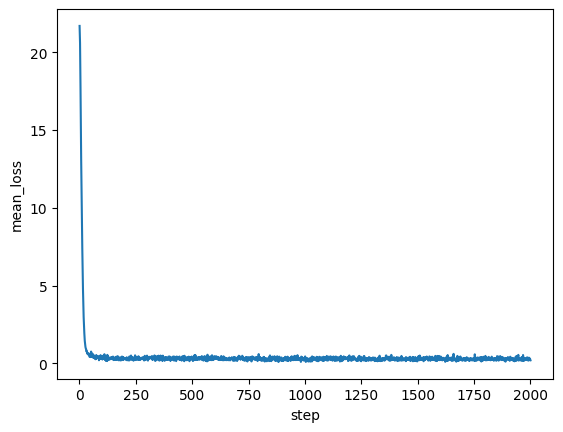

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the loss curve.
tuned_model = genai.get_tuned_model(f"{model_id}")
snapshots = pd.DataFrame(tuned_model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x="step", y="mean_loss")
#plt.clf()
#plt.cla()
plt.savefig('tuning-classification-tabular.png')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt


In [ ]:
from google.api_core import retry
import google.auth
import google.auth.transport.requests
import os
# You can use a system instruction to do more direct prompting, and get a
# more succinct answer.

retry_policy = {"retry": retry.Retry(predicate=retry.if_transient_error)}

# If you want to evaluate your own technique, replace this function with your
# model, prompt and other code and return the predicted answer.
def predict_label_tuned(post: str,apikey) -> str:

    genai.configure(api_key=apikey)
    tuned_model = genai.GenerativeModel(f"{model_id}")

    response = tuned_model.generate_content(post, request_options=retry_policy)
    rc = response.candidates[0]

    # Any errors, filters, recitation, etc we can mark as a general error
    if rc.finish_reason.name != "STOP":
        return "(error)"
    else:
        # Clean up the response.
        return response.text.strip()


#prediction = predict_label(sample_row)

#print(prediction)
#print()
#print("Correct!" if prediction == sample_label else "Incorrect.")

In [ ]:
tuned_model = genai.GenerativeModel(f'{model_id}')
tuned_model.generate_content("I am crazy")

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I understand that you're feeling overwhelmed and might be using \"crazy\" to express that. It's important to remember that you're not alone and there are people who care about you and want to help. \n\nIf you're feeling overwhelmed, here are some things you can do:\n\n* **Talk to someone you trust:** This could be a friend, family member, therapist, or anyone who you feel comfortable confiding in.\n* **Seek professional help:** A therapist can help you work through your feelings and develop coping mechanisms.\n* **Take care of yourself:** Make sure you're getting enough sleep, eating healthy foods, and exercising regularly.\n* **Engage in activities you enjoy:** This can help you de-stress and improve your mood.\n\nRemember, you are not alone and there is he

In [ ]:
tuned_instruct = """
You are a classification service. From the text between --- and --- if the text is very likely lead to the output '1'.
otherwise give output '0'. ---"""

tuned_model = genai.GenerativeModel(f'{model_id}')

In [ ]:
import time
#calculate base line prediction
def cal_baseline(row):
    post=row['Text'] + hc+scaleval+letguess
    prediction = predict_label_tuned(post,GOOGLE_API_KEY)
    time.sleep(4)
    if prediction == row['Class']:
        return 1
    else:
        return 0

df_happy=df_train[df_train['Class']=='0'].sample(50,random_state=5)
df_depress=df_train[df_train['Class']=='1'].sample(10,random_state=5)

df_eval = pd.concat([df_happy,df_depress],ignore_index=True)

correct = df_eval.apply(cal_baseline,axis=1).sum()
accuracy = correct/60
print(f'accuracy from baseline model {accuracy}')



accuracy from baseline model 0.5333333333333333


In [ ]:
df_test['Text']=df_train.apply(concatenate_columns, axis=1)

In [ ]:
from joblib import Parallel, delayed

df_test_subset = df_test.head(50)

# Parallelize the prediction process
df_test_subset['Depression'] = Parallel(n_jobs=-1)(  # -1 uses all available cores
    delayed(lambda row: predict_label_tuned(row['Text'] + hc+scaleval+letguess,GOOGLE_API_KEY))
    (row) for _, row in df_test_subset.iterrows()
)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

In [ ]:
submit_df = df_test[['id','Depression'][.copy()
submit_df.to_csv('llmsubmission.csv',index=False)

In [ ]:
df_test['Depression']

In [ ]:
response = tuned_model.generate_content(system_instruct+' : '+df_test['Text'][100])
print(response.text)
print('Expected '+df_test['Class'][100])

In [ ]:
new_text="Is Depression '0' or '1' from the following text: "+ df_test['Text'][0]
response = your_model.generate_content(new_text)

In [ ]:
print(response.text)